In [35]:
from fredapi import Fred
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose

fred = Fred(api_key='d59606a150e09c54fd5158bac863da0d')


In [36]:
def decompose(df, column_name, decomp_type='additive'):
    """
    A function that returns the trend, seasonality and residual captured by applying both multiplicative and
    additive model.
    df -> DataFrame
    column_name -> column_name for which trend, seasonality is to be captured
    """
    plt.rcParams.update({'figure.figsize': (20, 10)})        
    result_add = seasonal_decompose(df[column_name], model = decomp_type, extrapolate_trend='freq')
    result_add.plot().suptitle('Additive Decompose', fontsize=30)
    plt.show()
    plt.rcParams.update({'figure.figsize': (15, 5)})
    
    return result_add

In [426]:
unem = fred.get_series('LMUNRRTTNOM156S')/100
cpi = fred.get_series('NORCPIALLMINMEI')
interest = fred.get_series('IR3TIB01NOM156N') 
debt = fred.get_series('TDSAMRIAONCNO') 
gdp = fred.get_series('CLVMNACSCAB1GQNO')
eu_cpi = fred.get_series('ELGAS0EUCCM086NEST')

df = pd.concat([cpi,unem, interest, debt, gdp, eu_cpi], axis=1)
df = df.rename(columns={0:'cpi',1:'unem', 2:'interest', 3:'debt', 4:'gdp', 5:'eu_cpi'})
df = df.dropna()
shift = 4
df['cpi_yoy'] = df['cpi']/df['cpi'].shift(shift) - 1
df['unem_yoy'] = df['unem']/df['unem'].shift(shift) - 1
df['interest_yoy'] = df['interest']/df['interest'].shift(shift) - 1
df['debt_yoy'] = df['debt']/df['debt'].shift(shift) - 1
df['gdp_yoy'] = df['gdp']/df['gdp'].shift(shift) - 1
df['eu_cpi_yoy'] = df['eu_cpi']/df['eu_cpi'].shift(shift) - 1
df

,cpi,unem,interest,debt,gdp,eu_cpi,cpi_yoy,unem_yoy,interest_yoy,debt_yoy,gdp_yoy,eu_cpi_yoy
1996-01-01,67.3,0.043043,5.48,13729.0,483929.1,51.41,NaN,NaN,NaN,NaN,NaN,NaN
1996-04-01,67.9,0.043318,4.70,13909.0,483262.3,51.45,NaN,NaN,NaN,NaN,NaN,NaN
1996-07-01,68.3,0.042614,4.99,14321.0,499451.7,51.28,NaN,NaN,NaN,NaN,NaN,NaN
1996-10-01,68.9,0.038751,5.04,15022.0,491399.2,51.49,NaN,NaN,NaN,NaN,NaN,NaN
1997-01-01,69.3,0.036587,3.52,15313.0,504637.6,52.15,0.029718,-0.150006,-0.357664,0.115376,0.042792,0.014394
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-01,117.2,0.024543,0.74,98268.0,790881.9,119.64,0.035336,-0.366384,1.242424,-0.007885,0.046779,0.155607
2022-01-01,117.8,0.022944,1.10,98582.0,786350.7,136.80,0.032428,-0.410025,1.291667,-0.009256,0.044347,0.278146
2022-04-01,121.2,0.017952,1.27,93492.0,795518.1,146.37,0.053913,-0.526528,3.233333,-0.083160,0.043147,0.355152
2022-07-01,124.2,0.016841,2.24,89528.0,805385.1,154.32,0.067928,-0.456888,6.000000,-0.116671,0.022895,0.392026


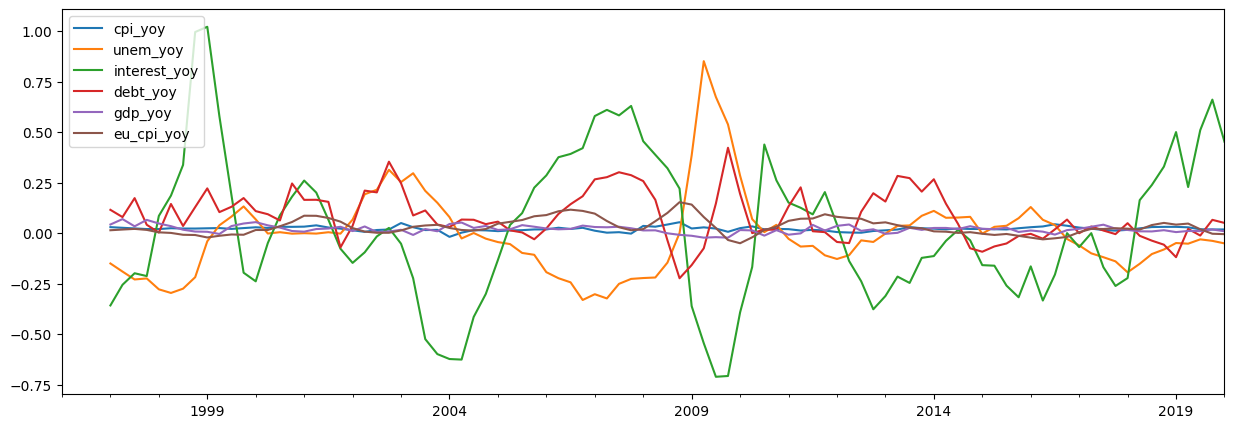

In [430]:
yoy_cols = ['cpi_yoy','unem_yoy', 'interest_yoy', 'debt_yoy', 'gdp_yoy', 'eu_cpi_yoy']
df[yoy_cols].iloc[:-11].plot()
plt.show()

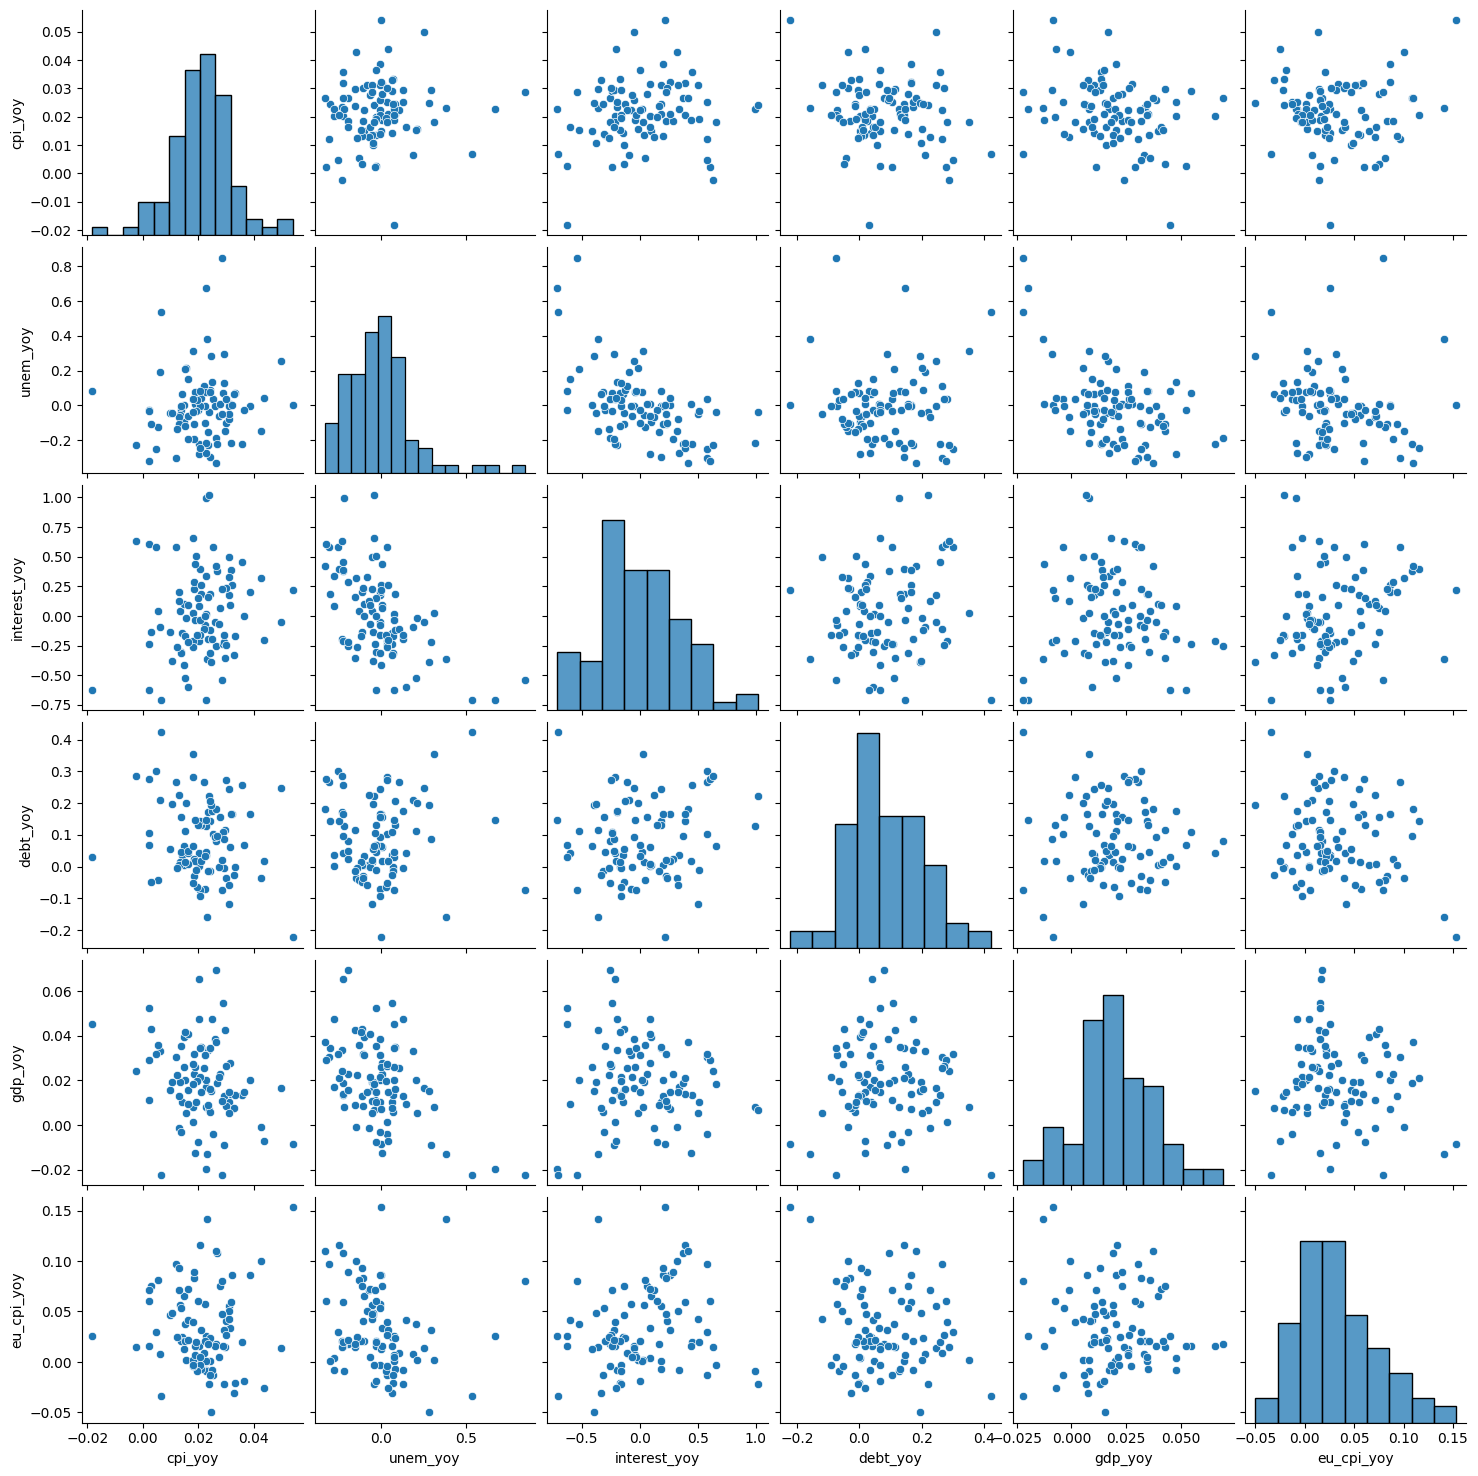

In [431]:
sns.pairplot(df[yoy_cols].iloc[:-12])
plt.show()

# TS decomp

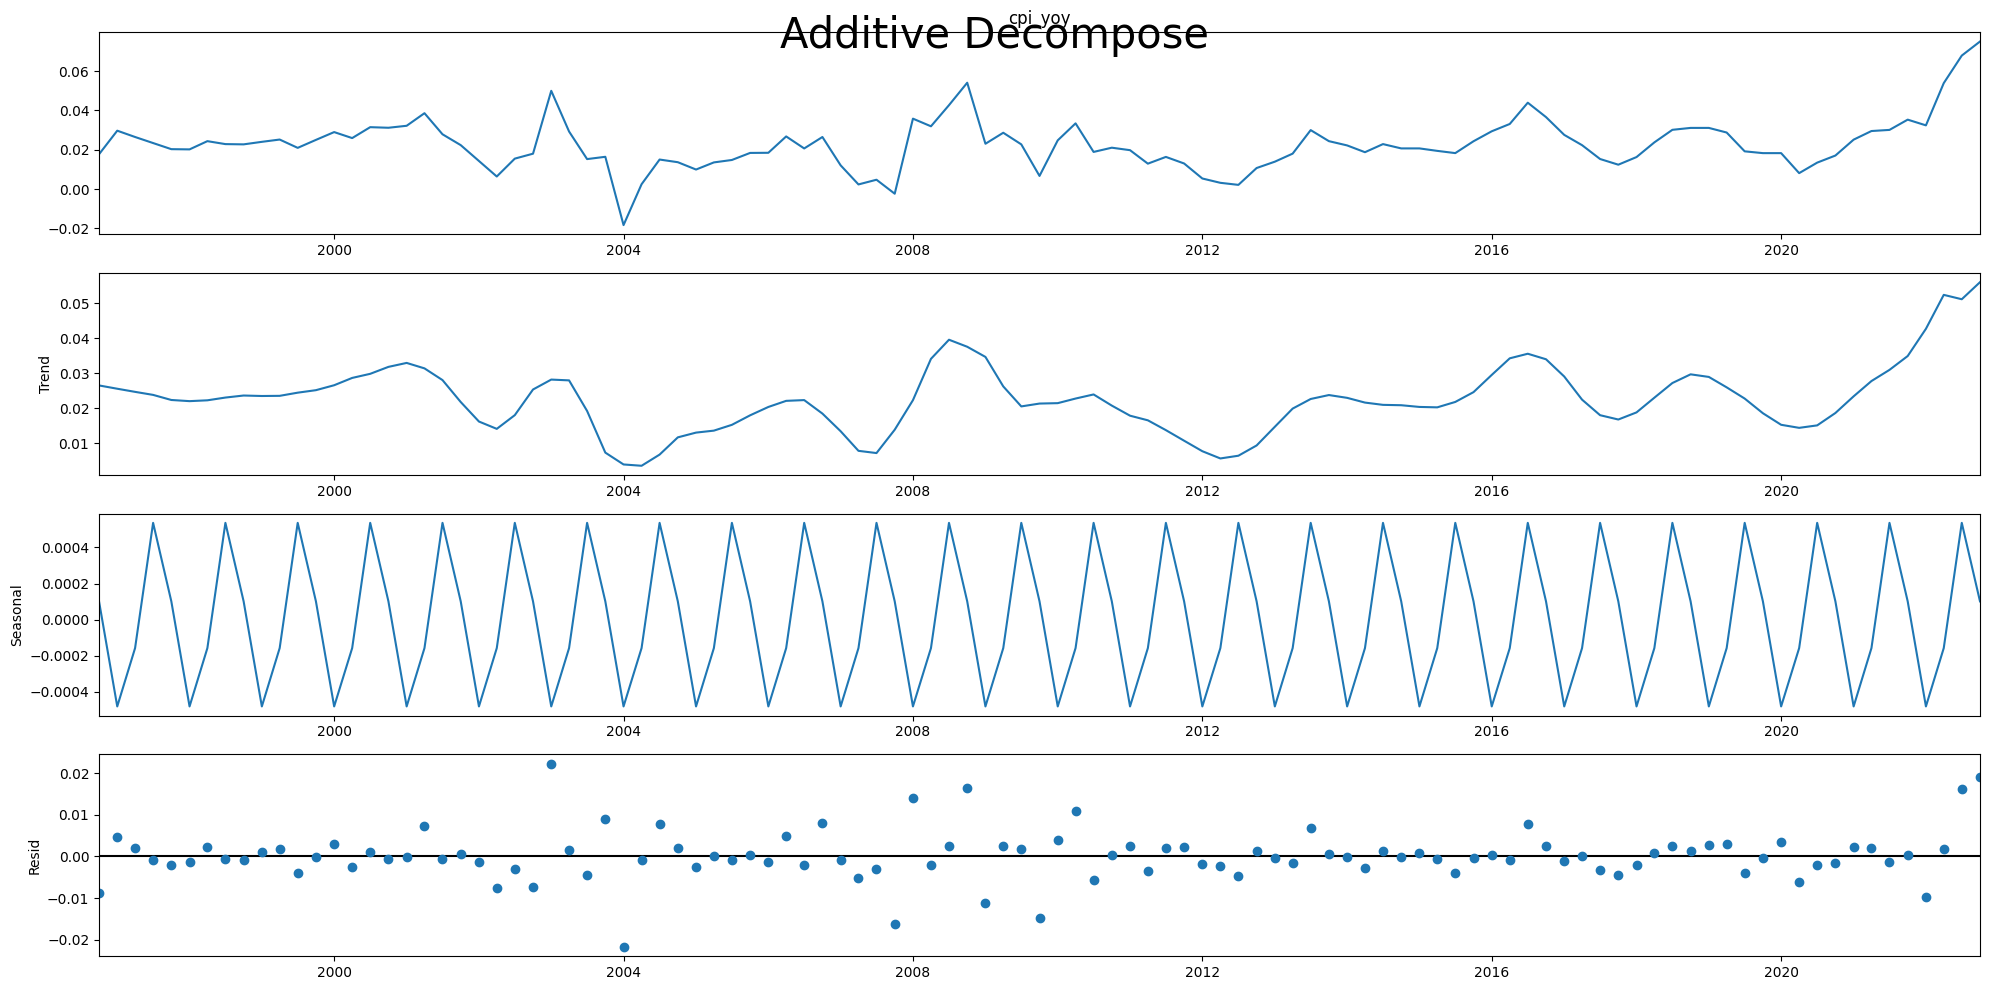

In [126]:
cpi_decomp = decompose(df.dropna(),'cpi_yoy', decomp_type='add')

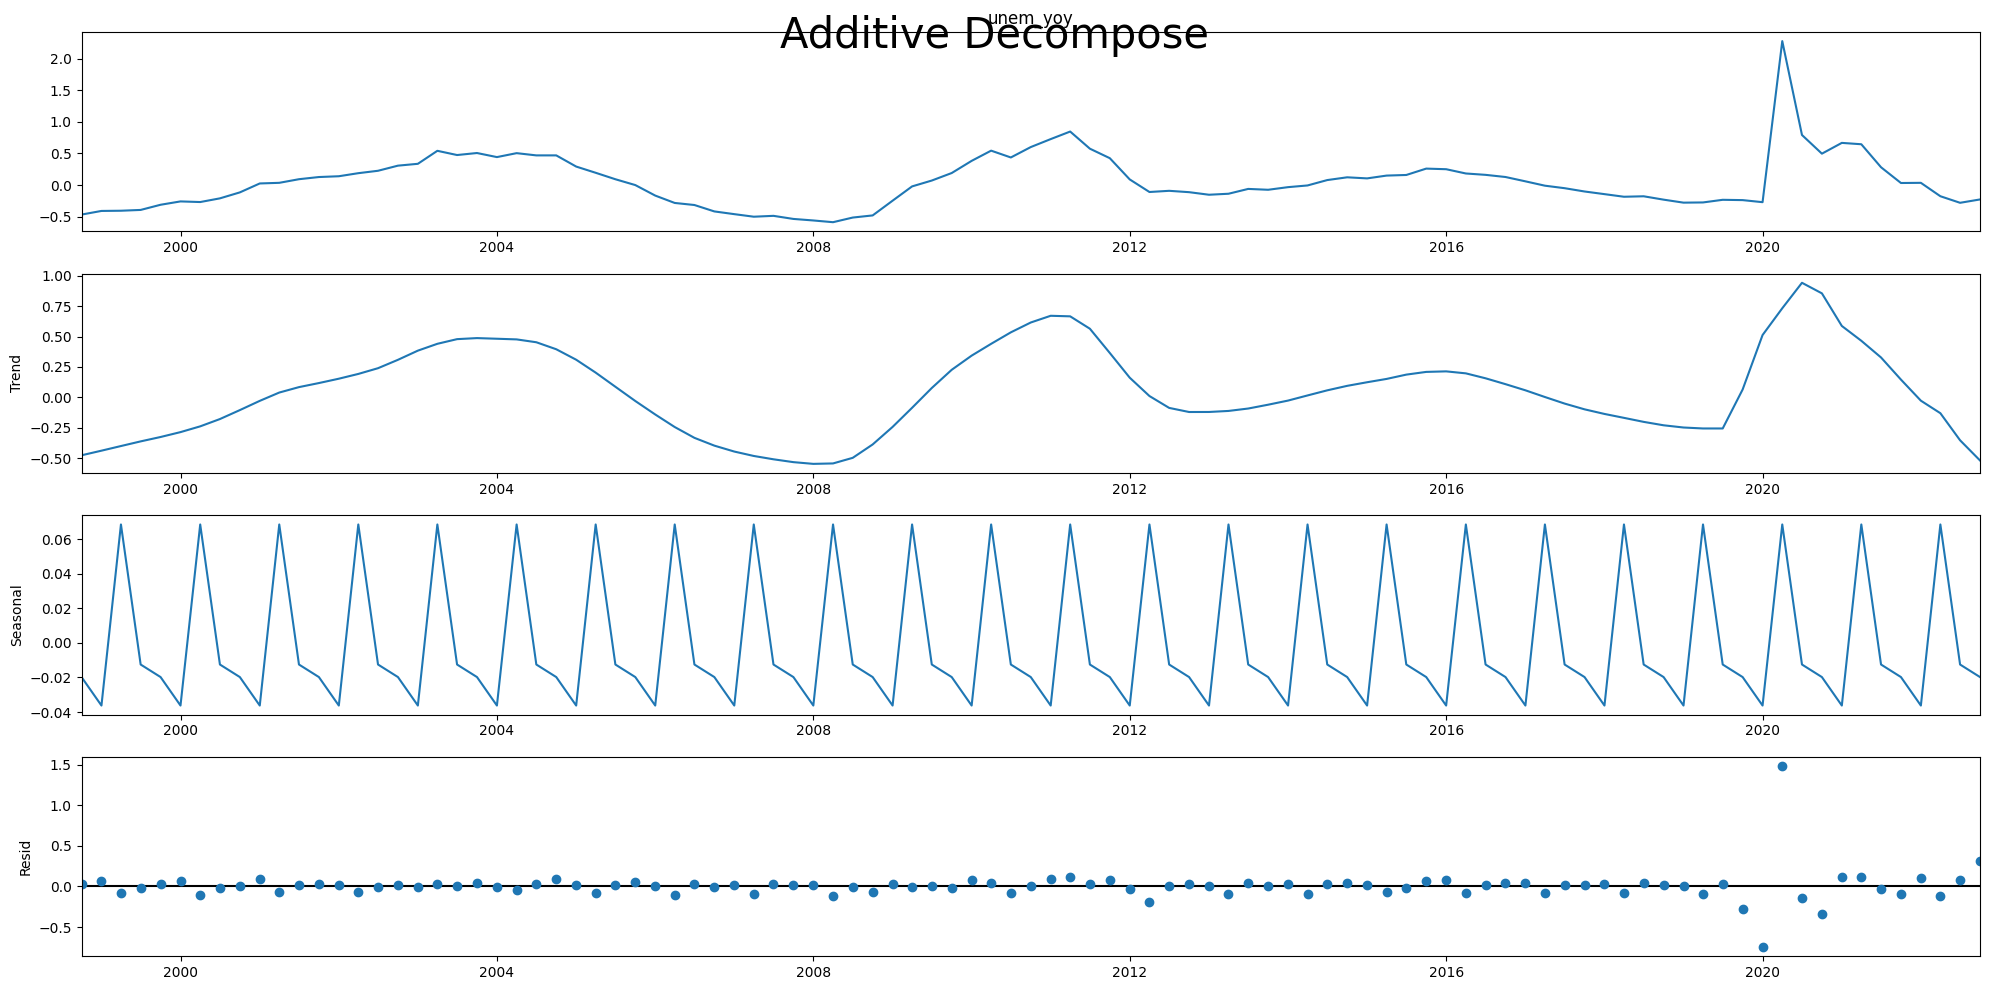

In [96]:
unem_decomp = decompose(df.dropna(),'unem_yoy', decomp_type='add')

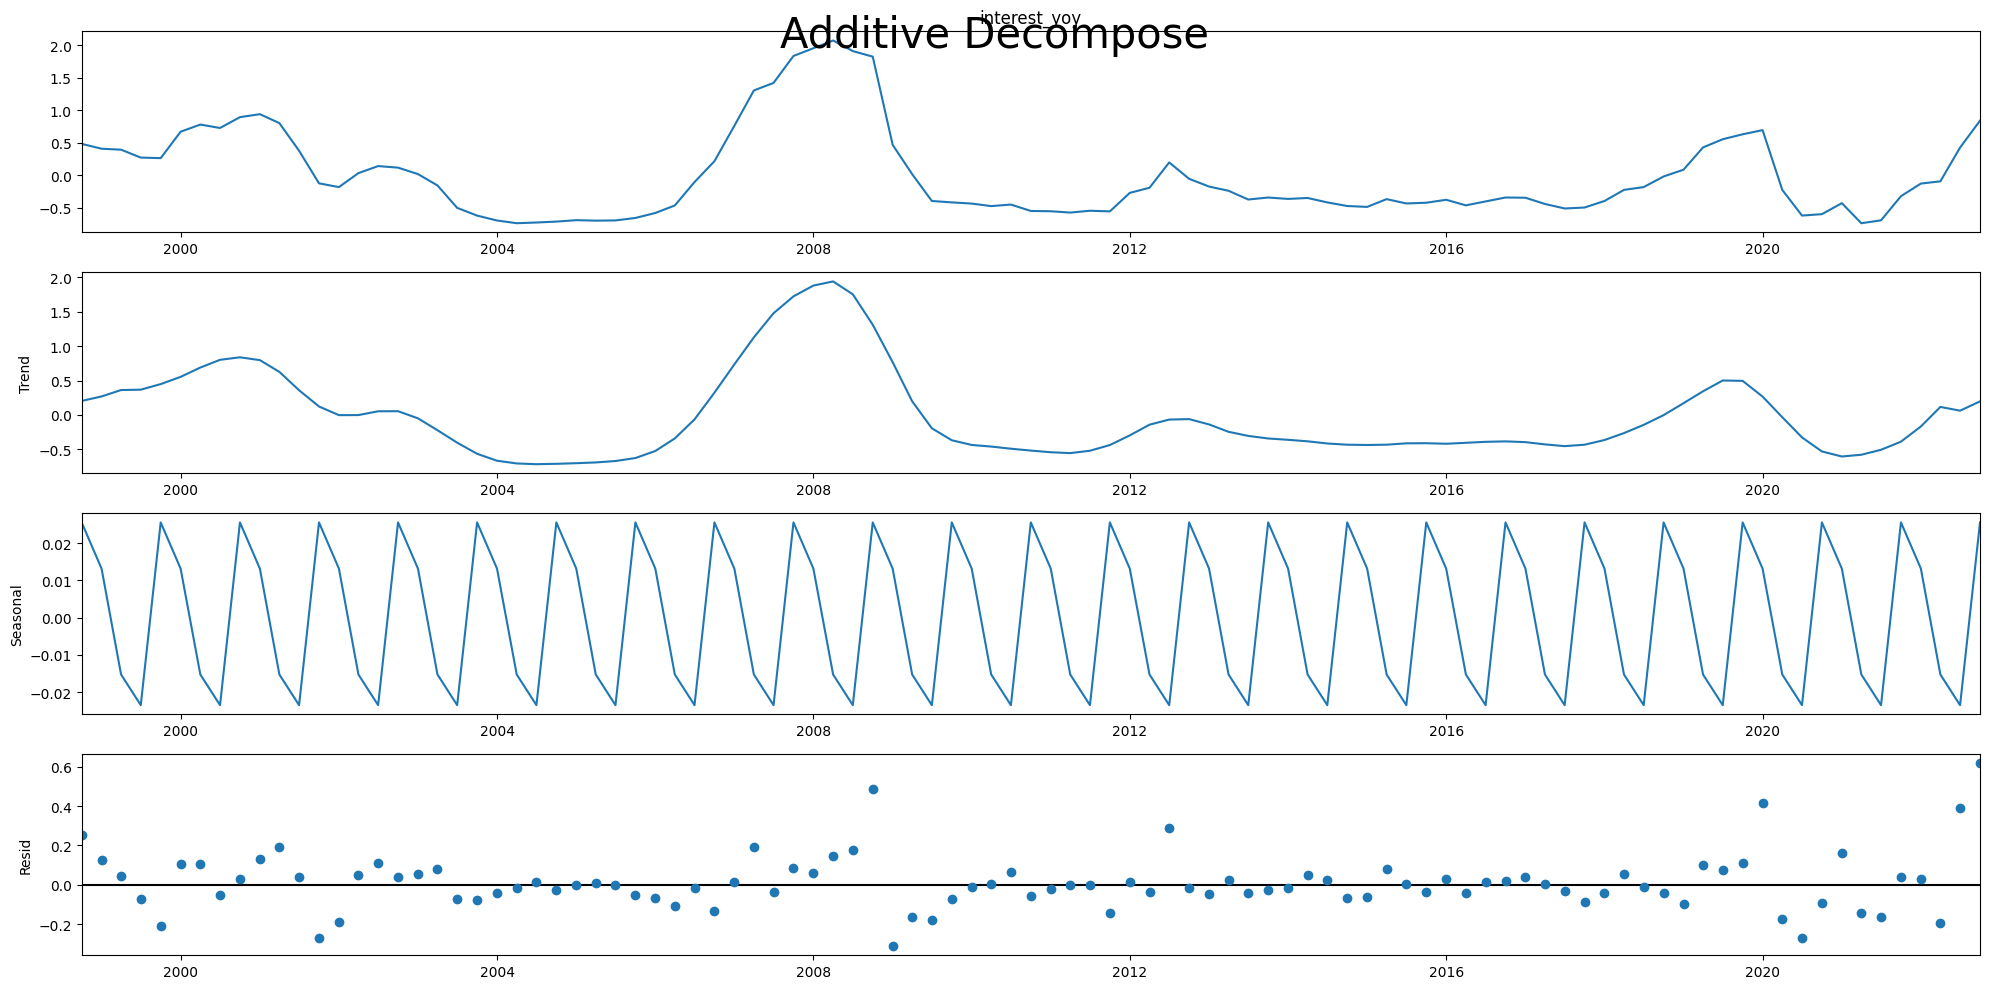

In [97]:
interest_decomp = decompose(df.dropna(),'interest_yoy', decomp_type='add')

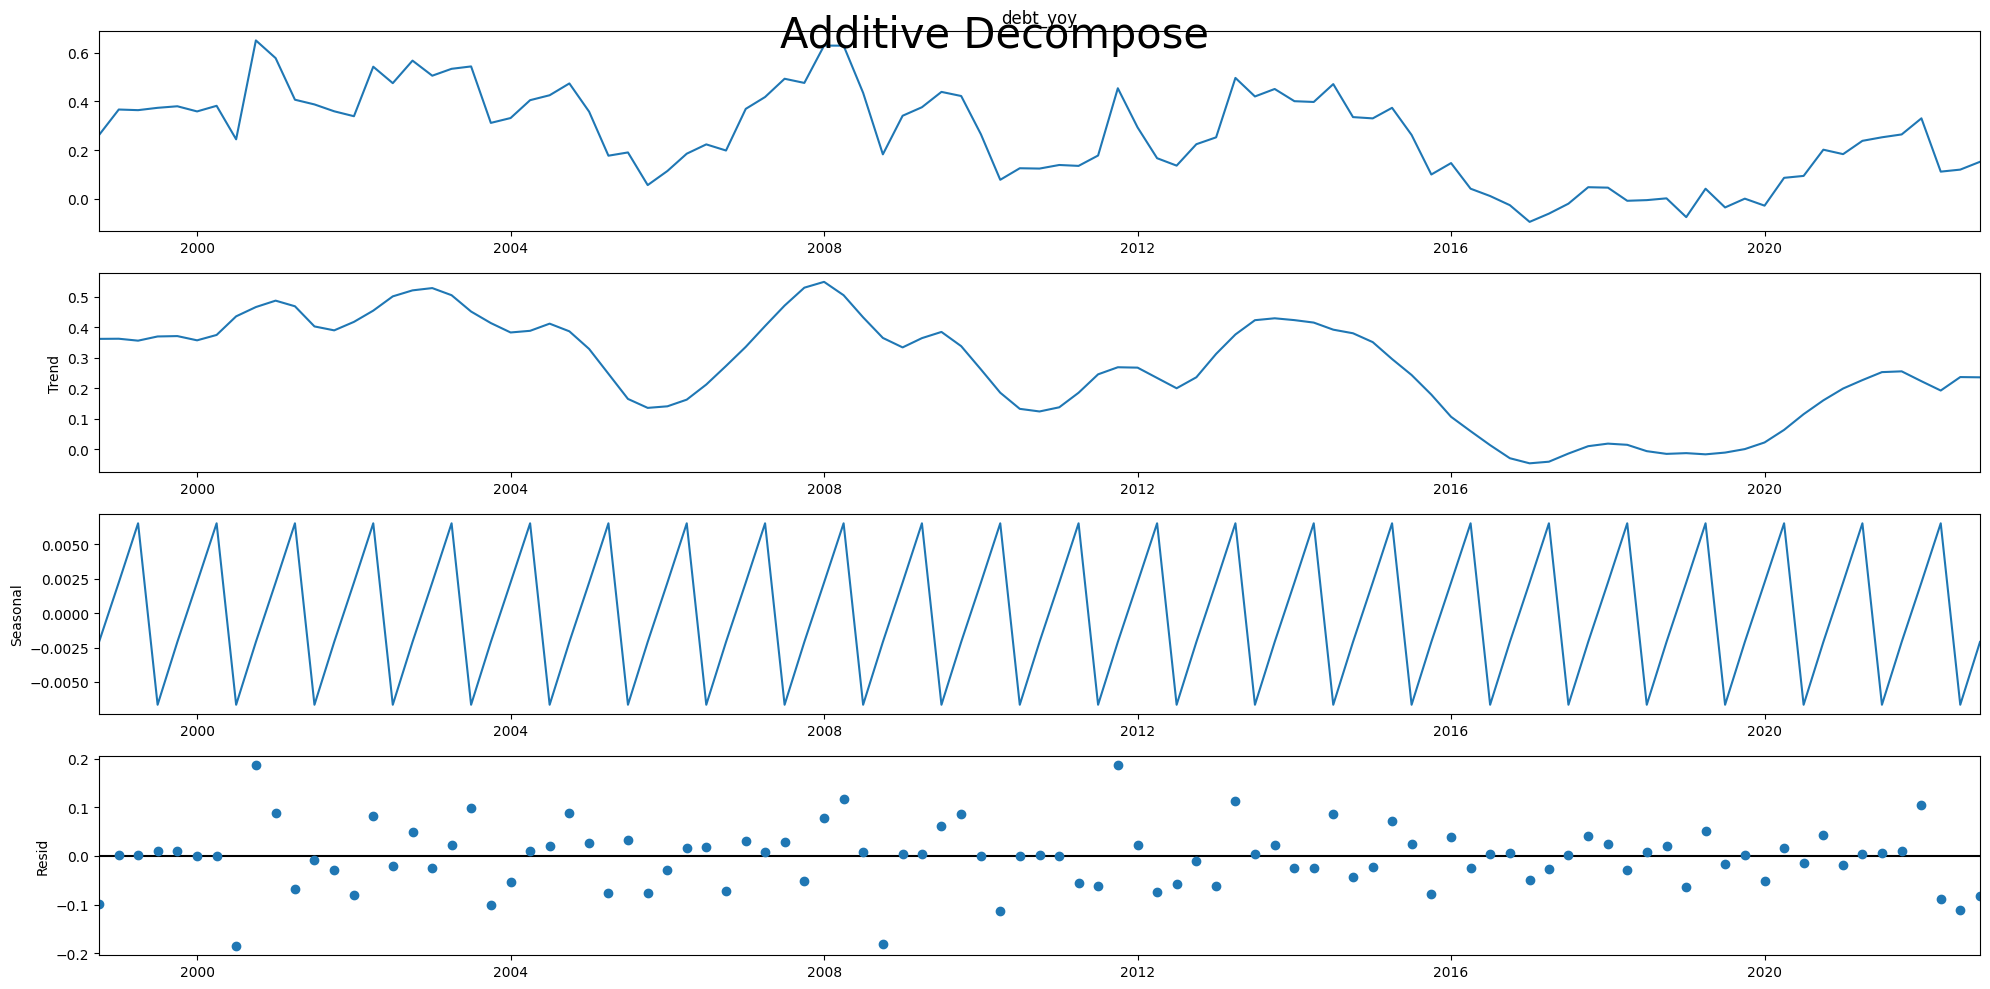

In [98]:
debt_decomp = decompose(df.dropna(),'debt_yoy', decomp_type='add')

# rest

In [432]:
cmap_kind = 'bwr'
df.corr().style.background_gradient(cmap=cmap_kind)

,cpi,unem,interest,debt,gdp,eu_cpi,cpi_yoy,unem_yoy,interest_yoy,debt_yoy,gdp_yoy,eu_cpi_yoy
cpi,1.000000,-0.115464,-0.736450,0.958799,0.976191,0.947785,0.286648,0.086588,0.308965,-0.307459,-0.188648,0.341865
unem,-0.115464,1.000000,-0.177932,-0.096698,-0.209552,-0.228867,-0.291708,0.753192,-0.431345,0.072383,-0.219166,-0.337269
interest,-0.736450,-0.177932,1.000000,-0.776213,-0.739903,-0.675957,0.108599,-0.108281,0.098127,0.287209,0.027844,-0.009967
debt,0.958799,-0.096698,-0.776213,1.000000,0.957934,0.918366,0.162798,0.113641,0.150759,-0.181411,-0.193188,0.185980
gdp,0.976191,-0.209552,-0.739903,0.957934,1.000000,0.925827,0.205750,0.015429,0.273211,-0.300068,-0.147256,0.315922
eu_cpi,0.947785,-0.228867,-0.675957,0.918366,0.925827,1.000000,0.357286,-0.012890,0.448275,-0.320607,-0.145997,0.521539
cpi_yoy,0.286648,-0.291708,0.108599,0.162798,0.205750,0.357286,1.000000,-0.193983,0.563775,-0.271687,-0.047569,0.534116
unem_yoy,0.086588,0.753192,-0.108281,0.113641,0.015429,-0.012890,-0.193983,1.000000,-0.380541,0.119628,-0.630972,-0.321998
interest_yoy,0.308965,-0.431345,0.098127,0.150759,0.273211,0.448275,0.563775,-0.380541,1.000000,-0.217748,0.115159,0.772727
debt_yoy,-0.307459,0.072383,0.287209,-0.181411,-0.300068,-0.320607,-0.271687,0.119628,-0.217748,1.000000,-0.069497,-0.301806


In [433]:

df[yoy_cols].corr().style.background_gradient(cmap=cmap_kind)

,cpi_yoy,unem_yoy,interest_yoy,debt_yoy,gdp_yoy,eu_cpi_yoy
cpi_yoy,1.000000,-0.193983,0.563775,-0.271687,-0.047569,0.534116
unem_yoy,-0.193983,1.000000,-0.380541,0.119628,-0.630972,-0.321998
interest_yoy,0.563775,-0.380541,1.000000,-0.217748,0.115159,0.772727
debt_yoy,-0.271687,0.119628,-0.217748,1.000000,-0.069497,-0.301806
gdp_yoy,-0.047569,-0.630972,0.115159,-0.069497,1.000000,0.137851
eu_cpi_yoy,0.534116,-0.321998,0.772727,-0.301806,0.137851,1.000000


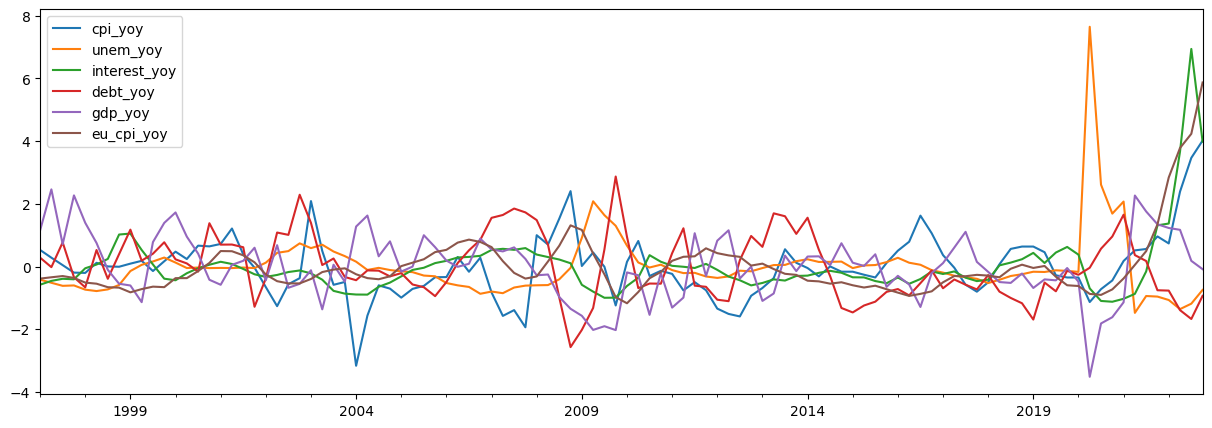

In [435]:
scaler = StandardScaler()
dfs = scaler.fit_transform(df[yoy_cols].dropna())
dff = pd.DataFrame(dfs,columns=df[yoy_cols].columns, index=df.dropna().index)
dff.plot()
plt.show()

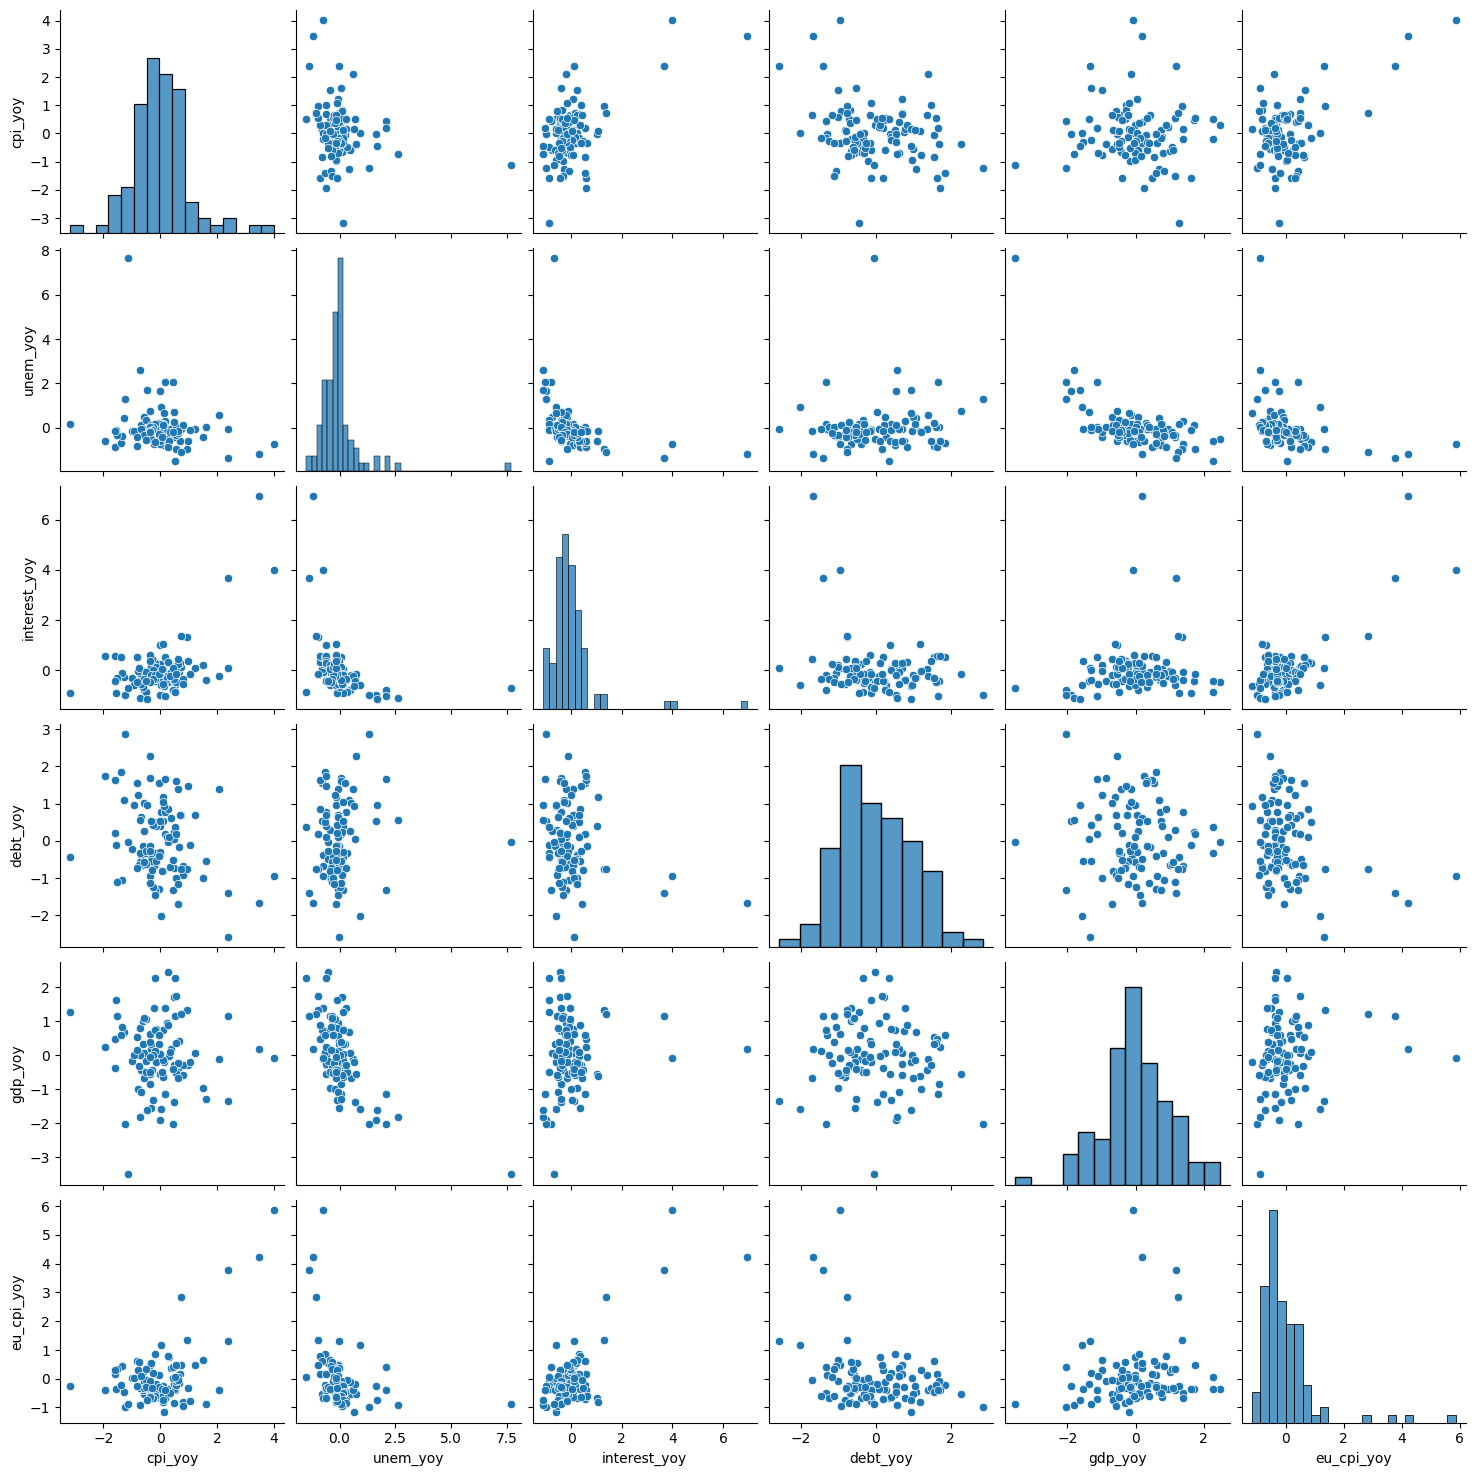

In [436]:
sns.pairplot(dff)
plt.show()

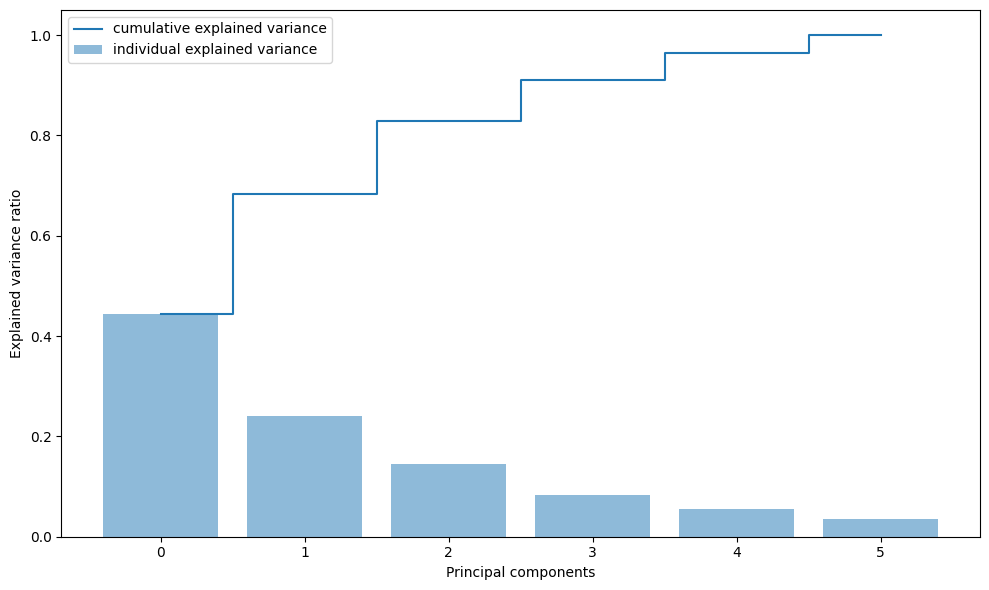

In [437]:
from sklearn.decomposition import PCA

pca = PCA()
T = pca.fit_transform(dff)

plt.figure(figsize=(10,6))
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(pca.explained_variance_ratio_)), np.cumsum(pca.explained_variance_ratio_), where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [438]:
import plotly.express as px
# Plot the 3D data
fig = px.scatter_3d(x=T[:,0], y=T[:,1], z=T[:,2],color=dff['cpi_yoy'])
# Adjust the marker size
fig.update_traces(marker=dict(size=2))
# Show the plot
fig.show()

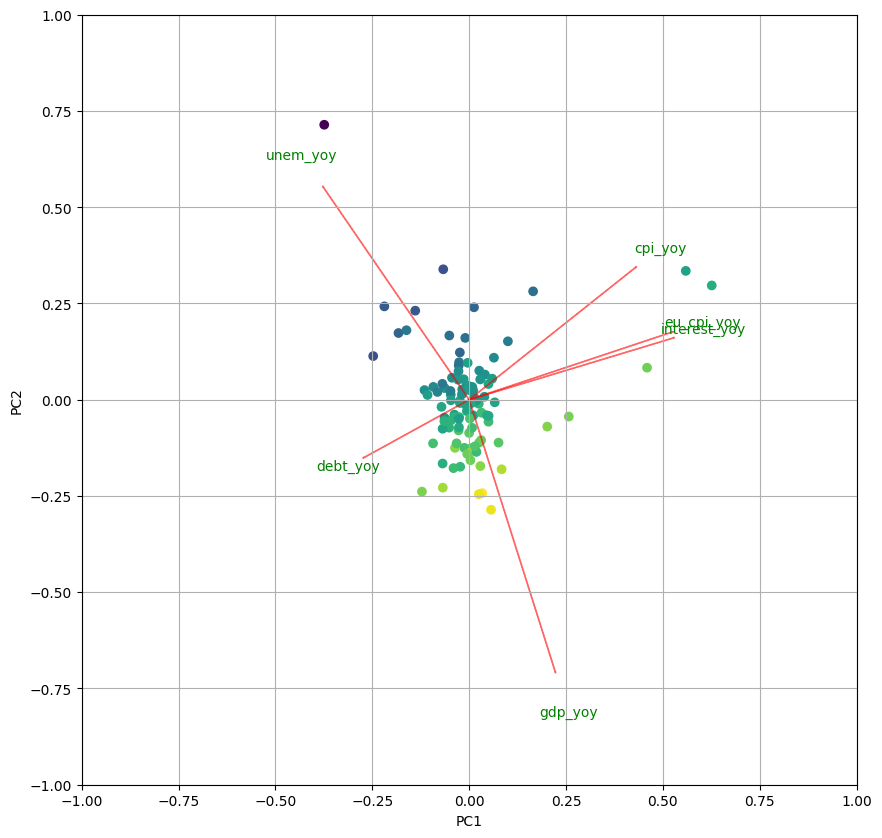

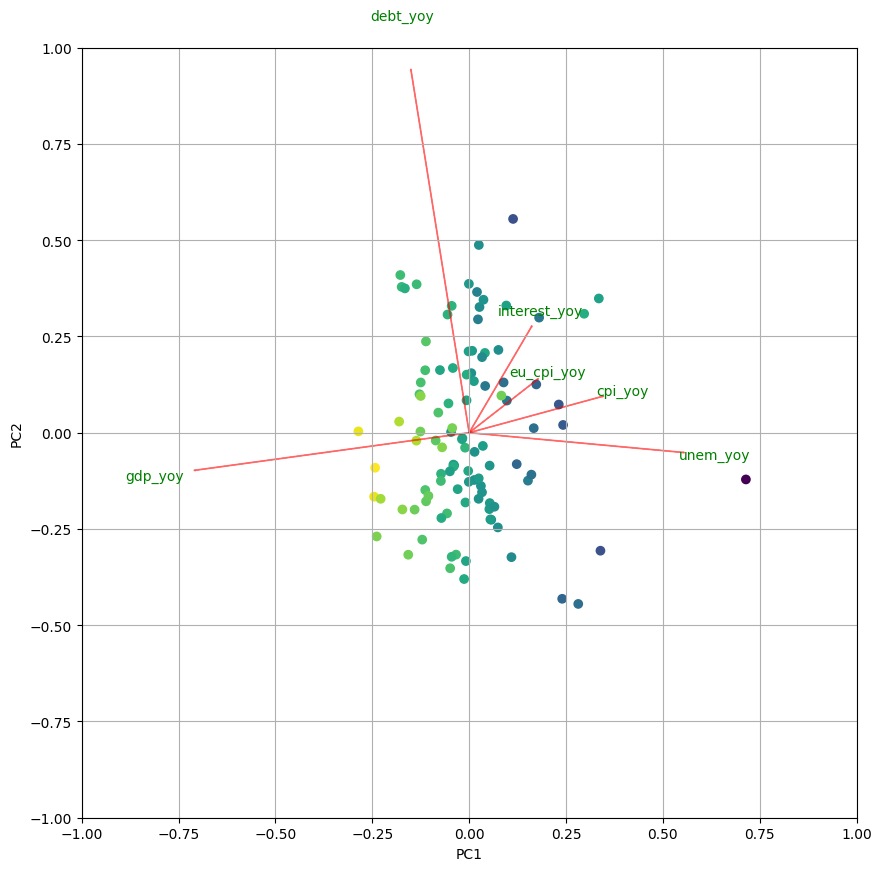

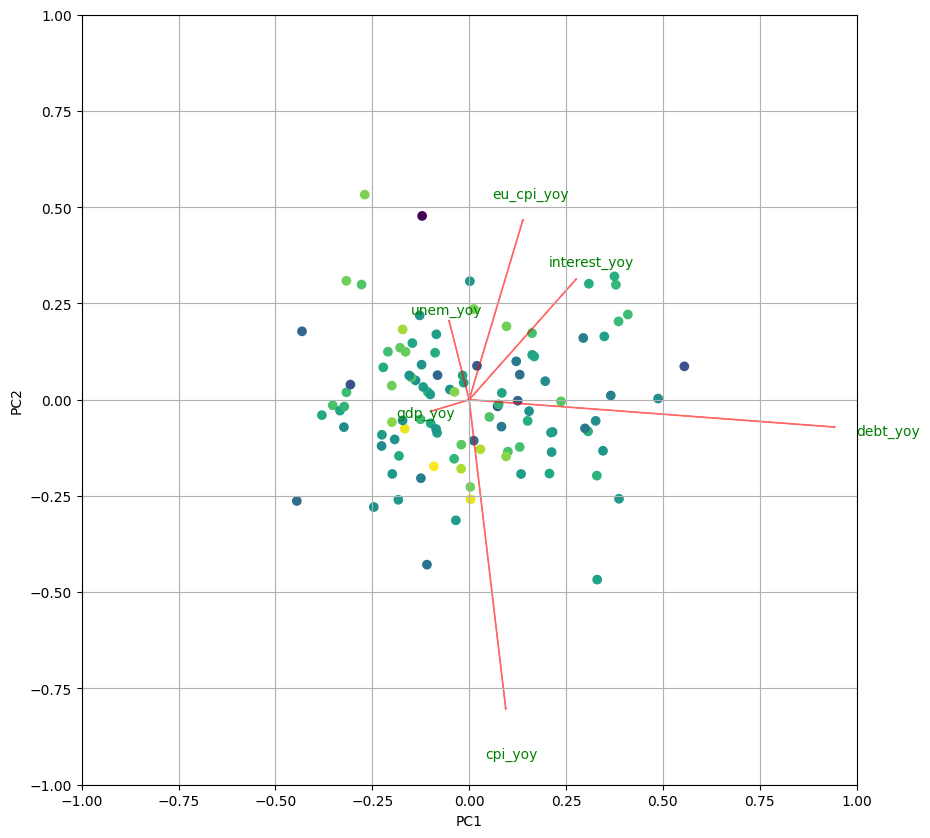

In [445]:
def myplot(score,coeff,labels=None, y=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.figure(figsize=(10,10))
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
    plt.show()

#Call the function. Use only the 2 PCs.
myplot(T[:,0:2],np.transpose(pca.components_[0:2, :]), labels=dff.columns, y=dff['gdp_yoy'])
myplot(T[:,1:3],np.transpose(pca.components_[1:3, :]), labels=dff.columns, y=dff['gdp_yoy'])
myplot(T[:,2:4],np.transpose(pca.components_[2:4, :]), labels=dff.columns, y=dff['gdp_yoy'])

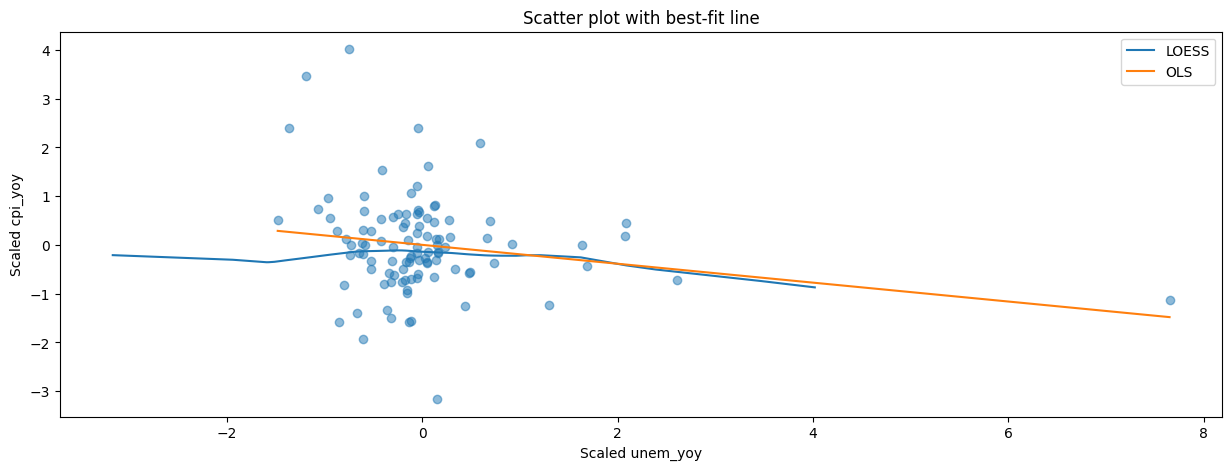

In [446]:
from statsmodels.nonparametric.smoothers_lowess import lowess

# Calculate the LOESS smoothed values.
smoothed = lowess(dff['unem_yoy'], dff['cpi_yoy'])

plt.scatter(dff['unem_yoy'], dff['cpi_yoy'], alpha=0.5)

# Calculate the best-fit line parameters (slope and intercept).
m, b = np.polyfit(dff['unem_yoy'], dff['cpi_yoy'], 1)

# Generate the x values for the best-fit line (from minimum to maximum of your x values).
x_line = np.linspace(dff['unem_yoy'].min(), dff['unem_yoy'].max(), 100)

# Calculate the corresponding y values using the slope (m) and intercept (b).
y_line = m * x_line + b

# Plot the LOESS smoothed curve.
plt.plot(smoothed[:, 0], smoothed[:, 1], label='LOESS')
plt.plot(x_line, y_line, label='OLS')

plt.xlabel('Scaled unem_yoy')
plt.ylabel('Scaled cpi_yoy')
plt.title('Scatter plot with best-fit line')
plt.legend()
plt.show()


In [465]:
import statsmodels.api as sm

interest = 'cpi_yoy'
y = dff[interest]
X = sm.add_constant(dff.drop(interest, axis=1))
ols = sm.OLS(y,X)
results = ols.fit_regularized(method='elastic_net', alpha=0.0, L1_wt=1.0)
#print(results.summary())

In [469]:
results.summary()

NotImplementedError: 

# Regimesyn på inflajon og arbiedsledighet ved bruk av K-means

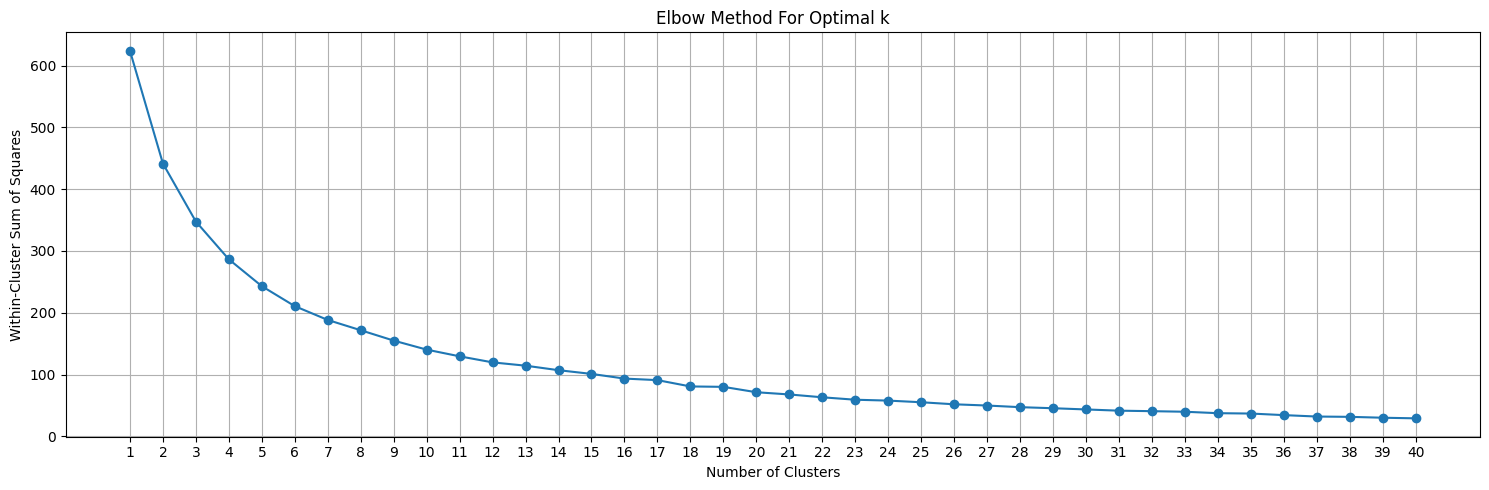

In [442]:
from sklearn.cluster import KMeans

# Determine sum of squared distances for a range of cluster counts
wcss = []  # Within-cluster sum of squares
cluster_range = range(1, 41)  # Let's check for up to 10 clusters, you can increase if necessary

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(dff)
    wcss.append(kmeans.inertia_)  # Inertia is the sum of squared distances to the closest centroid for each point

# Plotting the elbow graph
plt.plot(cluster_range, wcss, '-o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.grid(True)
plt.xticks(cluster_range)
plt.tight_layout()
plt.show()

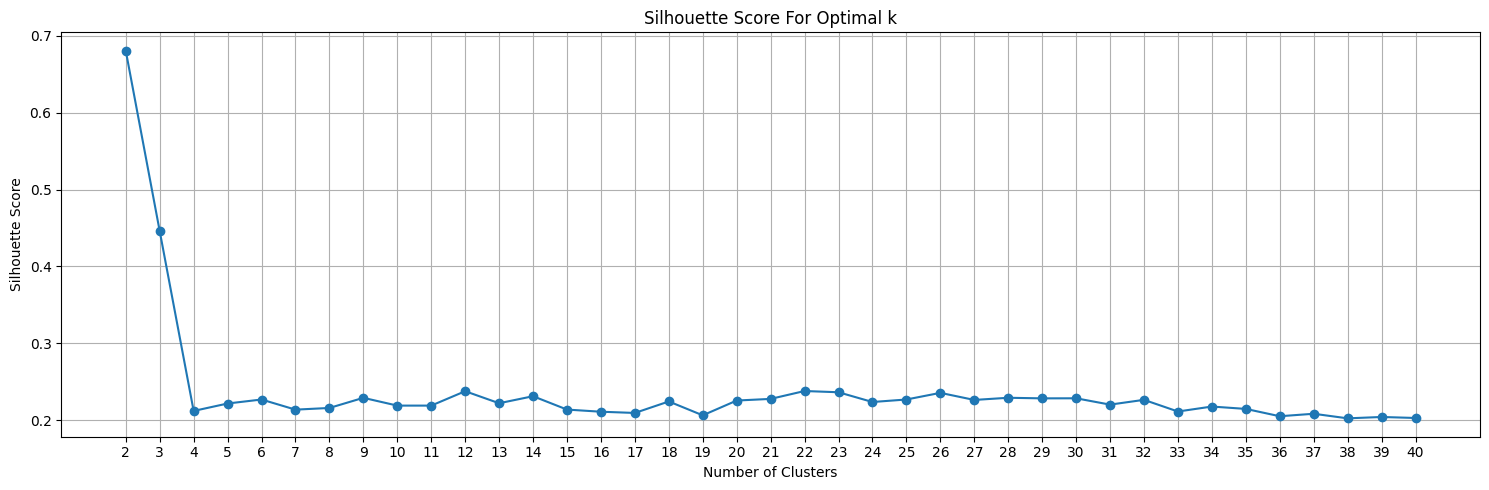

In [443]:
from sklearn.metrics import silhouette_score

sil_scores = []
cluster_range = range(2, 41)  # Starting from 2 as silhouette score requires at least 2 clusters

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    clusters = kmeans.fit_predict(dff)
    sil_score = silhouette_score(dff, clusters)
    sil_scores.append(sil_score)

# Plot Silhouette Scores
plt.plot(cluster_range, sil_scores, '-o')
plt.title('Silhouette Score For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.xticks(cluster_range)
plt.tight_layout()
plt.show()

/Users/williamsoma/miniconda3/envs/jobb/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



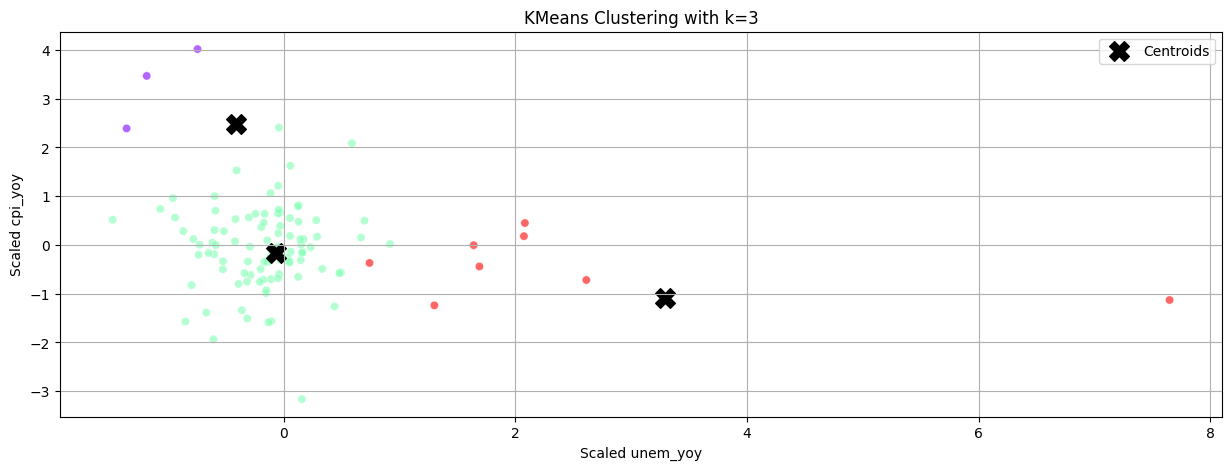

In [444]:
# Apply KMeans clustering
k = 3  # For example, you can choose another value based on domain knowledge or the Elbow method
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(dff)

# Plotting the data colored by clusters
plt.scatter(dff['unem_yoy'], dff['cpi_yoy'], c=clusters, cmap='rainbow', alpha=0.6, edgecolors='w', linewidth=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X', label='Centroids')

plt.xlabel('Scaled unem_yoy')
plt.ylabel('Scaled cpi_yoy')
plt.title(f'KMeans Clustering with k={k}')
plt.legend()
plt.grid(True)
plt.show()


# Student-t MLE

In [372]:
def tdist_MLE(y,v):
    mu0 = None
    sigma20 = None
    mu = 1
    sigma2 = 1
    w = np.array([i/y.shape[0] for i in range(y.shape[0])])
    
    while mu0 != mu and sigma20 != sigma2:
        mu0 = mu
        sigma20 = sigma2
    
        mu = np.sum(w*y)/np.sum(w)

        sigma2 = np.sum(w*(y-mu)**2)/len(y)

        w = ((v + 1) * sigma2)/(v*sigma2+(y-mu)**2)
        
    y.hist()
    plt.axvline(mu, c='r')
    plt.axvline(mu+np.sqrt(sigma2), c='orange')    
    plt.axvline(mu-np.sqrt(sigma2), c='orange')    
    plt.show()
    return mu, sigma2, w

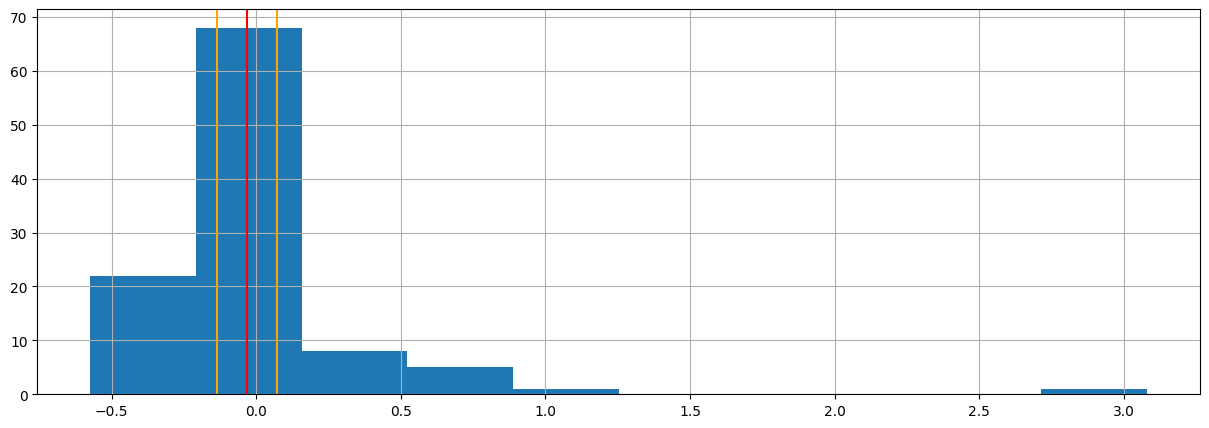

-0.03241853079924621 0.010843110828467239


In [414]:
v = 1 # for v = 1 we get the Cauchy distribution
y = df['unem_yoy'].dropna()
mu, sigma2, w = tdist_MLE(y,v)

print(mu, sigma2)

In [413]:
print(y.mean(),y.std())

0.01610131520820264 0.4006558601809749


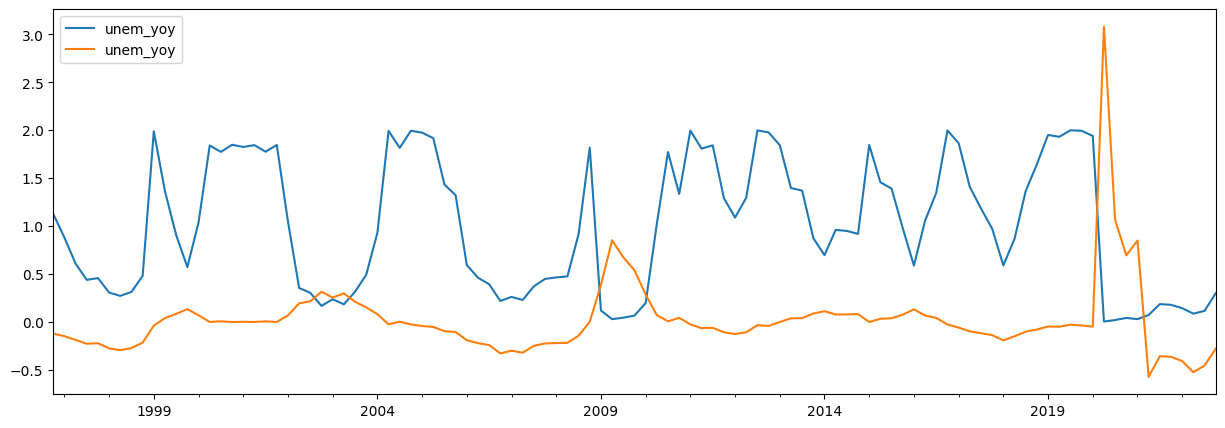

In [412]:
w.plot()
df['unem_yoy'].dropna().plot()
plt.legend()
plt.show()